In [1]:
# # Code piece to mount my Google Drive
# from google.colab import drive
# drive.mount("/content/drive") # my Google Drive root directory will be mapped here

# import os
# thisdir = '/content/drive/MyDrive/Capstone'
# os.chdir(thisdir)

In [5]:
import pandas as pd

# Load JSON files into DataFrames
hawk_df = pd.read_json('hawk_extracted.json')
centers_df = pd.read_json('centers_extracted.json')
map_df = pd.read_json('map_extracted.json')


In [6]:
import pandas as pd

# Dictionary to store DataFrames
dataframes = {
    'hawk': hawk_df,
    'centers': centers_df,
    'map': map_df
}

# Loop through DataFrames and apply inspection methods
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print("-" * 20)
    print(f"Head (10):\n{df['Area'].head(10)}\n")
    print(f"Unique values:\n{df['Area'].unique()}\n")
    print(f"Value counts:\n{df['Area'].value_counts()}\n")
    print("=" * 30 + "\n")  # Separator between DataFrames

DataFrame: hawk
--------------------
Head (10):
0                
1                
2                
3      370,000 SF
4      430,000 SF
5    1,300,000 SF
6                
7                
8                
9       21,100 SF
Name: Area, dtype: object

Unique values:
['' '370,000 SF' '430,000 SF' '1,300,000 SF' '21,100 SF' '135,513 SF'
 '164,453 SF' '47,508 SF' '71,033 SF' '88,489 SF' '392,500 SF'
 '400,000 SF' '457,788 SF' '480,000 SF' '769,144 SF' '1,051,610 SF'
 '84,000 kW' '243,000 SF' '750,000 SF' '24,000 SF' '188,447 SF'
 '201,719 SF' '940,000 SF' '22,000 SF' '2,294,300 SF' '460,000 SF'
 '1,098,052 SF' '222,955 SF' '128,715 SF' '700,000 SF' '154,230 SF'
 '72,000' '186,000 SF' '124,000 SF' '132,175 SF' '150,000' '62,002 SF'
 '286,800 SF' '142,000 SF' '214,000 SF' '229,435 SF' '113,250 SF'
 '1,700,000 SF' '256,000 SF' '446,000 SF' '150,000 SF' '326,000 SF'
 '342,003 SF' '433,300 SF' '72,696 SF' '30,339 SF' '42,374 SF'
 '113,300 SF' '249,809 SF' '392,800 SF' '284,500 SF' '226,000 

In [7]:
import pandas as pd

# Assume the DataFrames are stored in a dictionary named dataframes:
# dataframes = {'hawk': hawk_df, 'centers': centers_df, 'map': map_df}

# Define keywords to check for (in lowercase)
keywords = ['kw', 'mw']

for name, df in dataframes.items():
    # Convert the column to lowercase and check for any occurrence of our keywords.
    contains_kw = df['Area'].str.lower().str.contains('|'.join(keywords), na=False)
    count_kw = contains_kw.sum()

    if count_kw > 0:
        print(f"DataFrame '{name}': Found {count_kw} entries containing {keywords}")
    else:
        print(f"DataFrame '{name}': No entries found containing {keywords}")

DataFrame 'hawk': Found 62 entries containing ['kw', 'mw']
DataFrame 'centers': No entries found containing ['kw', 'mw']
DataFrame 'map': Found 2 entries containing ['kw', 'mw']


In [11]:
import pandas as pd

# Create copies of the original DataFrames to store cleaned data
cleaned_dataframes = {name: df.copy() for name, df in dataframes.items()}

for name, df in cleaned_dataframes.items():
    # Convert the 'Area' column to lowercase for case-insensitive matching
    df['Area_lower'] = df['Area'].str.lower()

    # Use boolean indexing to filter rows containing keywords
    filtered_df = df[df['Area_lower'].str.contains('|'.join(keywords), na=False)]

    if not filtered_df.empty:
        print(f"\nDataFrame '{name}': Found entries containing '{keywords}'")
        # Iterate through the filtered DataFrame
        for index, row in filtered_df.iterrows():
            area_value = row['Area']
            # Check if 'Area' contains 'kw' or 'mw'
            if isinstance(area_value, str) and ('kw' in area_value.lower() or 'mw' in area_value.lower()):
                print("\nBefore modification:")
                print(f"Index: {index}")
                print(f"Area: {area_value}")
                print(f"Power: {row['Power']}")
                
                try:
                    # Extract the numeric part (digits and .) from 'Area'
                    numeric_str = ''.join(filter(lambda ch: ch.isdigit() or ch == '.', area_value))
                    numeric_part = float(numeric_str)
                    df.loc[index, 'Power'] = numeric_part  # Update 'Power' column
                    df.loc[index, 'Area'] = None           # Set 'Area' to None
                    
                    print("\nAfter modification:")
                    print(f"Area: {df.loc[index, 'Area']}")
                    print(f"Power: {df.loc[index, 'Power']}")
                    
                except ValueError:
                    print(f"Warning: Could not extract a number from '{area_value}' in DataFrame '{name}' at index {index}")
    else:
        print(f"\nDataFrame '{name}': No entries found containing '{keywords}'")

    # Clean up temporary column
    df.drop('Area_lower', axis=1, inplace=True)

# Store cleaned DataFrames back into variables
hawk_df_cleaned = cleaned_dataframes['hawk']
centers_df_cleaned = cleaned_dataframes['centers']
map_df_cleaned = cleaned_dataframes['map']

# Save cleaned DataFrames to CSV files
for name, df in cleaned_dataframes.items():
    df.to_csv(f'{name}_cleaned_power.csv', index=False)
    print(f"\nSaved cleaned DataFrame '{name}' to '{name}_cleaned_power.csv'")


DataFrame 'hawk': No entries found containing '['kw', 'mw']'

DataFrame 'centers': No entries found containing '['kw', 'mw']'

DataFrame 'map': No entries found containing '['kw', 'mw']'

Saved cleaned DataFrame 'hawk' to 'hawk_cleaned_power.csv'

Saved cleaned DataFrame 'centers' to 'centers_cleaned_power.csv'

Saved cleaned DataFrame 'map' to 'map_cleaned_power.csv'


In [18]:
hawk_df_cleaned.head(10)

,unique_key,source,Name,Provider,StreetAddress,City,ZipCode,State,Country,Whitespace,Area,YearBuilt,Power,Scale,Certifications,URL
0,Northern Virginia_facility_1,datacenterhawk,PowerHouse Data Centers · ABX-1Featured,Dominion Energy,21529 Beaumeade Circle,Ashburn,,VA,United States,"265,000 SF",,2023,36 MW,,,https://datacenterhawk.com/marketplace/provide...
1,Northern Virginia_facility_2,datacenterhawk,Aligned Data Centers · 10920 Balls Ford Road,Aligned,10920 Balls Ford Road,Manassas,,VA,United States,,,,,,,https://datacenterhawk.com/marketplace/provide...
2,Northern Virginia_facility_3,datacenterhawk,Aligned Data Centers · IAD02,Aligned,21821 Uunet Drive,Ashburn,,VA,United States,"513,000 SF",,2022,,,,https://datacenterhawk.com/marketplace/provide...
3,Northern Virginia_facility_4,datacenterhawk,Aligned Data Centers · IAD01,Aligned,21890 Uunet Drive,Ashburn,,VA,United States,"370,000 SF","370,000 SF",2019,,,,https://datacenterhawk.com/marketplace/provide...
4,Northern Virginia_facility_5,datacenterhawk,Aligned Data Centers · IAD03,Aligned Data Centers,22715 Relocation Drive,Sterling,,VA,United States,"430,000 SF","430,000 SF",2023,,,,https://datacenterhawk.com/marketplace/provide...
5,Northern Virginia_facility_6,datacenterhawk,Aligned Data Centers · IAD04,FirstEnergy/Potomac Edison,5601 Manor Woods Road,Frederick,,MD,United States,"1,300,000 SF","1,300,000 SF",,"36,000 kW",,"ISO, HIPAA, SOC 2",https://datacenterhawk.com/marketplace/provide...
6,Northern Virginia_facility_7,datacenterhawk,Aligned Data Centers · IAD06,First Energy/Potomac Edison,5601 Manor Woods Road,Frederick,,MD,United States,,,,,,"HIPAA, ISO, NIST",https://datacenterhawk.com/marketplace/provide...
7,Northern Virginia_facility_8,datacenterhawk,Aligned Data Centers · IAD07,FirstEnergy/Potomac Edison,5601 Manor Woods Road,Frederick,,MD,United States,,,,,,"HIPAA, ISO, SOC 2",https://datacenterhawk.com/marketplace/provide...
8,Northern Virginia_facility_9,datacenterhawk,Aligned Data Centers · IAD08,FirstEnergy/Potomac Edison,5601 Manor Woods Road,Frederick,,MD,United States,,,,,,"SOC 2, NIST, HIPAA",https://datacenterhawk.com/marketplace/provide...
9,Northern Virginia_facility_10,datacenterhawk,Atlantic.Net · 1807 Michael Faraday Court,Dominion Virginia Power,1807 Michael Faraday Court,Reston,,VA,United States,"21,100 SF","21,100 SF",1982,,,,https://datacenterhawk.com/marketplace/provide...


In [20]:
import re
import pandas as pd
import numpy as np



def standardize_power(value):
    if pd.isna(value) or value == "" or "No data" in str(value) or "Not Available" in str(value):
        return np.nan  # Handle missing or invalid entries
    
    value = str(value).replace(",", "").strip()  # Remove commas and extra spaces

    # Case 1: Handle multipliers (e.g., "3 x 1500 kW generators")
    multiplier_match = re.match(r"(\d+)\s*x\s*(\d+)\s*(kW|MW)", value, re.IGNORECASE)
    if multiplier_match:
        count, num, unit = multiplier_match.groups()
        num = float(num)
        total = int(count) * num
        return total if unit.lower() == "mw" else total / 1000  # Convert kW to MW if needed
    
    # Case 2: Handle "X kW, Y kW" formats (e.g., "800 kW, 1000 kW")
    multiple_values = re.findall(r"(\d+\.?\d*)\s*(kW|MW)", value, re.IGNORECASE)
    if multiple_values:
        total = sum(float(num) / 1000 if unit.lower() == "kw" else float(num) for num, unit in multiple_values)
        return total

    # Case 3: Handle ranges (e.g., "3kW to 15kW" -> take upper bound)
    range_match = re.search(r"(\d+\.?\d*)\s*(kW|MW)?\s*(?:to|-)\s*(\d+\.?\d*)\s*(kW|MW)?", value, re.IGNORECASE)
    if range_match:
        _, _, high, high_unit = range_match.groups()
        high = float(high)
        return high if (high_unit and high_unit.lower() == "mw") else high / 1000  # Convert kW to MW if needed

    # Case 4: Handle approximate values like "More than 10 MW" (take the number)
    approx_match = re.search(r"(\d+\.?\d*)\s*(kW|MW)", value, re.IGNORECASE)
    if approx_match:
        num, unit = approx_match.groups()
        num = float(num)
        return num if unit.lower() == "mw" else num / 1000  # Convert kW to MW if needed

    # Case 5: Handle pure numeric values (assume MW if unit is missing)
    if re.match(r"^\d+(\.\d+)?$", value):
        num = float(value)
        return num / 1000 if num > 10000 else num  # Assume kW if >10,000, otherwise assume MW

    return np.nan  # If it doesn't match any pattern, mark as missing

# Apply the function to all three datasets
df_list = [hawk_df_cleaned, centers_df_cleaned, map_df_cleaned]  # Assuming all datasets are in DataFrames
for df in df_list:
    df['Power_Standardized'] = df['Power'].apply(standardize_power)

In [27]:
centers_df_cleaned.head(10)

,unique_key,source,Name,Provider,StreetAddress,City,ZipCode,State,Country,Whitespace,Area,YearBuilt,Power,Scale,Certifications,URL,Power_Standardized
0,tierpoint-valley-forge,datacenters.com,TierPoint: Valley Forge Data Center,TierPoint,1000 Adams Avenue,Norristown,,PA,USA,137000 sqft total space,61000 sqft colocation space,,,,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-valley-f...,NaN
1,flexential-dallas-richardson,datacenters.com,Flexential: Dallas - Richardson Data Center,Flexential,3010 Waterview Pkwy,Richardson,75080,TX,USA,100807 sqft,50851 sqft,,3.0 MW,,"HITRUST CSF, NIST 800-53, PCI DSS, SOC 1 Type ...",https://www.datacenters.com/flexential-dallas-...,3.0
2,tierpoint-nashville,datacenters.com,TierPoint: Nashville Data Center,TierPoint,311 Eddy Lane,Franklin,,TN,USA,52000 sqft total space,26000 sqft colocation space,,,,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-nashville,NaN
3,flexential-cincinnati,datacenters.com,Flexential: Cincinnati Data Center,Flexential,5307 Muhlhauser Rd,Hamilton,45011,OH,USA,43551 sqft total space,16000 sqft colocation space,,,,"NIST 800-53, PCI DSS, SOC 1 Type 2, SOC 2 Type...",https://www.datacenters.com/flexential-cincinnati,NaN
4,tierpoint-allentown-tekpark,datacenters.com,TierPoint: Allentown - TekPark Data Center,TierPoint,9999 Hamilton Boulevard,Breinigsville,,PA,USA,122000 sqft total space,58300 sqft colocation space,,25.0 MW total power,,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-allentow...,25.0
5,tierpoint-raleigh,datacenters.com,TierPoint: Raleigh Data Center,TierPoint,5301 Departure Drive,Raleigh,,NC,USA,65000 sqft total space,40000 sqft colocation space,,2.0 MW total power,,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-raleigh,2.0
6,flexential-atlanta-norcross,datacenters.com,Flexential: Atlanta - Norcross Data Center,Flexential,2775 Northwoods Pkwy,Norcross,30071,GA,USA,32740 sqft total space,10000 sqft colocation space,,2.0 MW total power,,"HIPAA, ISO 27001, PCI DSS, SOC 1 Type 2, SOC 2...",https://www.datacenters.com/flexential-atlanta...,2.0
7,coresite-va1-reston,datacenters.com,,,,,,,,,,,,,,https://www.datacenters.com/coresite-va1-reston,NaN
8,tierpoint-new-york-hwt-hawthorne,datacenters.com,TierPoint: New York - HWT Hawthorne Data Center,TierPoint,11 Skyline Drive,Hawthorne,,NY,USA,46000 sqft total space,28000 sqft colocation space,,,,"EU-US, HIPAA, HITRUST CSF, ISO 27001, NIST 800...",https://www.datacenters.com/tierpoint-new-york...,NaN
9,coresite-ny2-new-jersey-secaucus,datacenters.com,CoreSite: NY2 New Jersey Secaucus Data Center,CoreSite,2 Emerson Lane,Secaucus,,NJ,USA,236000 sqft total space,236000 sqft,,,,"FISMA, HIPAA, ISO 27001, NIST 800-53, PCI DSS,...",https://www.datacenters.com/coresite-ny2-new-j...,NaN


In [30]:
hawk_df_cleaned.to_csv('hawk_power.csv', index=False)
centers_df_cleaned.to_csv('centers_power.csv', index=False)
map_df_cleaned.to_csv('map_power.csv', index=False)
print("Cleaned CSV files saved successfully.")

Cleaned CSV files saved successfully.


In [41]:
hawk_df_cleaned[['Whitespace','Area']]

,Whitespace,Area
0,"265,000 SF",
1,,
2,"513,000 SF",
3,"370,000 SF","370,000 SF"
4,"430,000 SF","430,000 SF"
...,...,...
2332,"318,297 SF","318,297 SF"
2333,"60,480 SF",
2334,"61,554 SF",
2335,,9 million


In [42]:
import pandas as pd
import re
import numpy as np

# Conversion factors
ACRE_TO_SQFT = 43560  # 1 acre = 43,560 sqft
SQM_TO_SQFT = 10.764  # 1 sqm = 10.764 sqft

def convert_to_sqft(area):
    """Convert area values into consistent square feet (SF) format."""
    if pd.isna(area) or not isinstance(area, str) or area.strip() == "":
        return None  # Keep missing values as NaN

    area = area.lower().replace(",", "").strip()  # Remove commas and standardize case

    # Case 1: Convert "M SF" or "million SF"
    million_match = re.match(r"([\d.]+)\s*(m|million)\s*sf", area)
    if million_match:
        return int(float(million_match.group(1)) * 1_000_000)

    # Case 2: Convert acres to sqft
    acre_match = re.match(r"([\d.]+)\s*acre", area)
    if acre_match:
        return int(float(acre_match.group(1)) * ACRE_TO_SQFT)

    # Case 3: Convert square meters to sqft
    sqm_match = re.match(r"([\d.]+)\s*(square meters|sqm)", area)
    if sqm_match:
        return int(float(sqm_match.group(1)) * SQM_TO_SQFT)

    # Case 4: Handle ranges (e.g., "3,500 SF - 15,000 SF" → take the upper bound)
    range_match = re.search(r"(\d+\.?\d*)\s*(sq.?ft.?|sf)?\s*(?:to|-)\s*(\d+\.?\d*)\s*(sq.?ft.?|sf)?", area)
    if range_match:
        _, _, high, _ = range_match.groups()
        return int(float(high))  # Take the upper limit

    # Case 5: Extract standard sqft values
    sqft_match = re.search(r"([\d]+(?:\.\d+)?)\s*(sq.?ft.?|sf|sq.?f.?|square feet)?", area)
    if sqft_match:
        return int(float(sqft_match.group(1)))

    return None  # If nothing matches, return NaN

def resolve_area_conflict(area, whitespace):
    """Determine the best value for Area when there is a conflict."""
    area_val = convert_to_sqft(area)
    whitespace_val = convert_to_sqft(whitespace)

    if pd.isna(area_val) and not pd.isna(whitespace_val):
        return whitespace_val  # Use Whitespace if Area is missing
    elif not pd.isna(area_val) and pd.isna(whitespace_val):
        return area_val  # Use Area if Whitespace is missing
    elif not pd.isna(area_val) and not pd.isna(whitespace_val):
        return max(area_val, whitespace_val)  # Take the larger value if both exist

    return np.nan  # If both are missing, keep NaN

# Apply the function to all three datasets
df_list = [hawk_df_cleaned, centers_df_cleaned, map_df_cleaned]
for df, df_name in zip(df_list, ["hawk", "centers", "map"]):
    df["Area_Standardized"] = df.apply(lambda row: resolve_area_conflict(row["Area"], row["Whitespace"]), axis=1)
    df.to_csv(f"{df_name}_area_cleaned.csv", index=False)  # Save cleaned data
    print(f"DataFrame '{df_name}' cleaned and saved to '{df_name}_area_cleaned.csv'")

DataFrame 'hawk' cleaned and saved to 'hawk_area_cleaned.csv'
DataFrame 'centers' cleaned and saved to 'centers_area_cleaned.csv'
DataFrame 'map' cleaned and saved to 'map_area_cleaned.csv'


In [44]:
hawk_df_cleaned.head()

,unique_key,source,Name,Provider,StreetAddress,City,ZipCode,State,Country,Whitespace,Area,YearBuilt,Power,Scale,Certifications,URL,Power_Standardized,Area_Standardized
0,Northern Virginia_facility_1,datacenterhawk,PowerHouse Data Centers · ABX-1Featured,Dominion Energy,21529 Beaumeade Circle,Ashburn,,VA,United States,"265,000 SF",,2023,36 MW,,,https://datacenterhawk.com/marketplace/provide...,36.0,265000.0
1,Northern Virginia_facility_2,datacenterhawk,Aligned Data Centers · 10920 Balls Ford Road,Aligned,10920 Balls Ford Road,Manassas,,VA,United States,,,,,,,https://datacenterhawk.com/marketplace/provide...,NaN,NaN
2,Northern Virginia_facility_3,datacenterhawk,Aligned Data Centers · IAD02,Aligned,21821 Uunet Drive,Ashburn,,VA,United States,"513,000 SF",,2022,,,,https://datacenterhawk.com/marketplace/provide...,NaN,513000.0
3,Northern Virginia_facility_4,datacenterhawk,Aligned Data Centers · IAD01,Aligned,21890 Uunet Drive,Ashburn,,VA,United States,"370,000 SF","370,000 SF",2019,,,,https://datacenterhawk.com/marketplace/provide...,NaN,370000.0
4,Northern Virginia_facility_5,datacenterhawk,Aligned Data Centers · IAD03,Aligned Data Centers,22715 Relocation Drive,Sterling,,VA,United States,"430,000 SF","430,000 SF",2023,,,,https://datacenterhawk.com/marketplace/provide...,NaN,430000.0


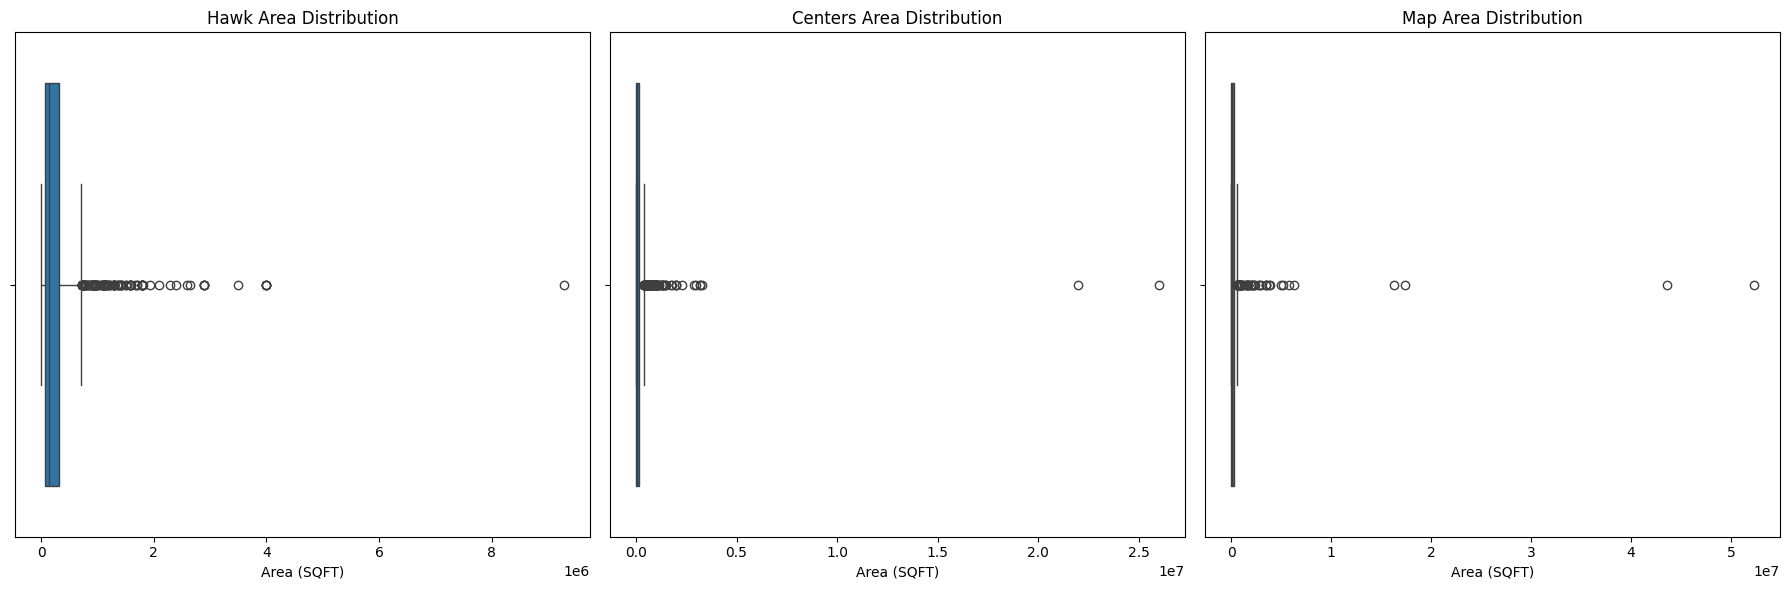

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with one subplot per dataframe
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (df, df_name) in zip(axes, zip([hawk_df_cleaned, centers_df_cleaned, map_df_cleaned], ['hawk', 'centers', 'map'])):
    sns.boxplot(x=df['Area_Standardized'], ax=ax)
    ax.set_title(f"{df_name.capitalize()} Area Distribution")
    ax.set_xlabel("Area (SQFT)")

plt.tight_layout()
plt.show()

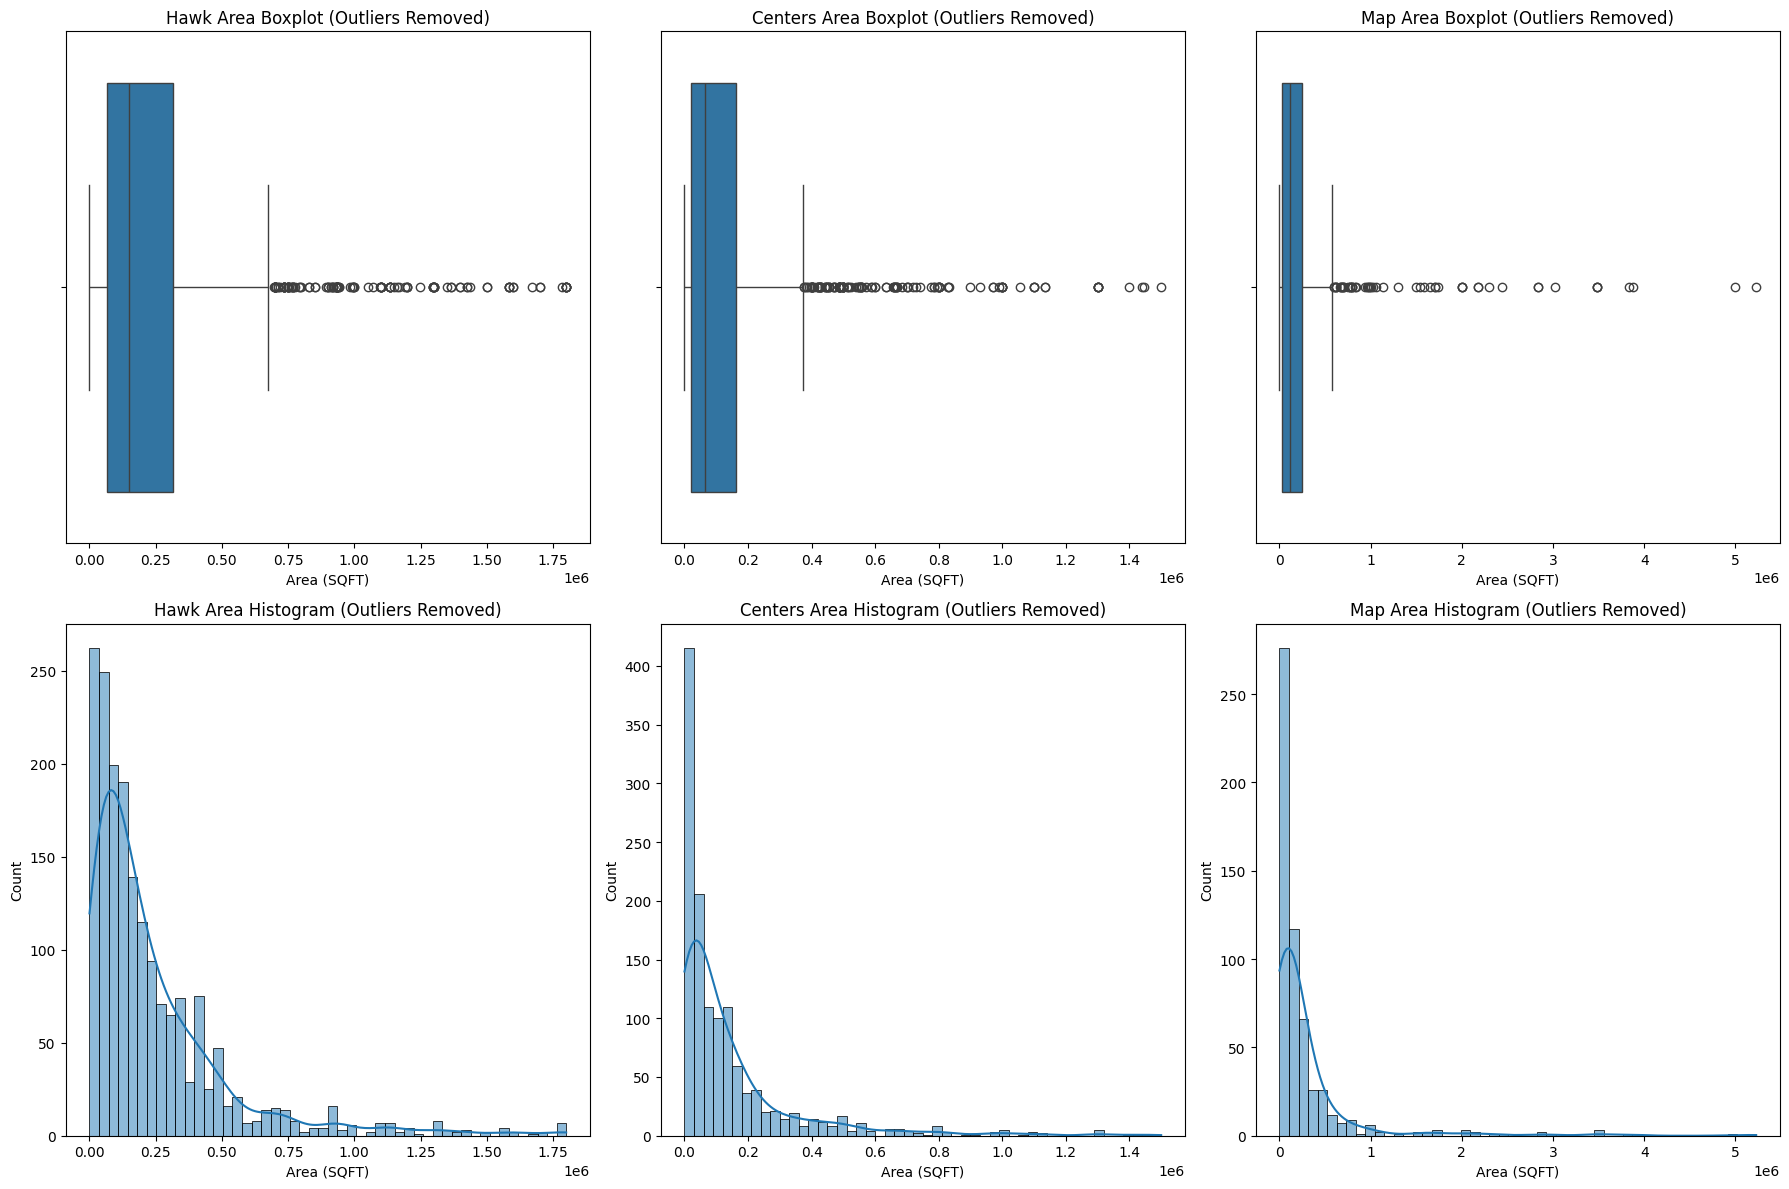

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (df, df_name) in enumerate(zip([hawk_df_cleaned, centers_df_cleaned, map_df_cleaned], ['hawk', 'centers', 'map'])):
    # Remove extreme values above the 99th percentile for better visualization
    upper_limit = np.percentile(df['Area_Standardized'].dropna(), 99)
    
    # Boxplot (Top Row)
    sns.boxplot(x=df[df['Area_Standardized'] <= upper_limit]['Area_Standardized'], ax=axes[0, i])
    axes[0, i].set_title(f"{df_name.capitalize()} Area Boxplot (Outliers Removed)")
    axes[0, i].set_xlabel("Area (SQFT)")

    # Histogram (Bottom Row)
    sns.histplot(df[df['Area_Standardized'] <= upper_limit]['Area_Standardized'], bins=50, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"{df_name.capitalize()} Area Histogram (Outliers Removed)")
    axes[1, i].set_xlabel("Area (SQFT)")

plt.tight_layout()
plt.show()

In [47]:
import numpy as np

# Dictionary to store outlier percentages
outlier_percentages = {}

# Compute outlier coverage in each dataset
for df_name, df in zip(["hawk", "centers", "map"], [hawk_df_cleaned, centers_df_cleaned, map_df_cleaned]):
    total_rows = len(df)
    upper_limit = np.percentile(df["Area_Standardized"].dropna(), 99)  # Compute 99th percentile
    outlier_count = (df["Area_Standardized"] > upper_limit).sum()  # Count outliers
    outlier_percentage = (outlier_count / total_rows) * 100  # Compute percentage
    outlier_percentages[df_name] = outlier_percentage

# Print results
for df_name, percentage in outlier_percentages.items():
    print(f"{df_name.capitalize()} Dataset: {percentage:.2f}% of values are outliers.")

Hawk Dataset: 0.73% of values are outliers.
Centers Dataset: 0.60% of values are outliers.
Map Dataset: 0.50% of values are outliers.


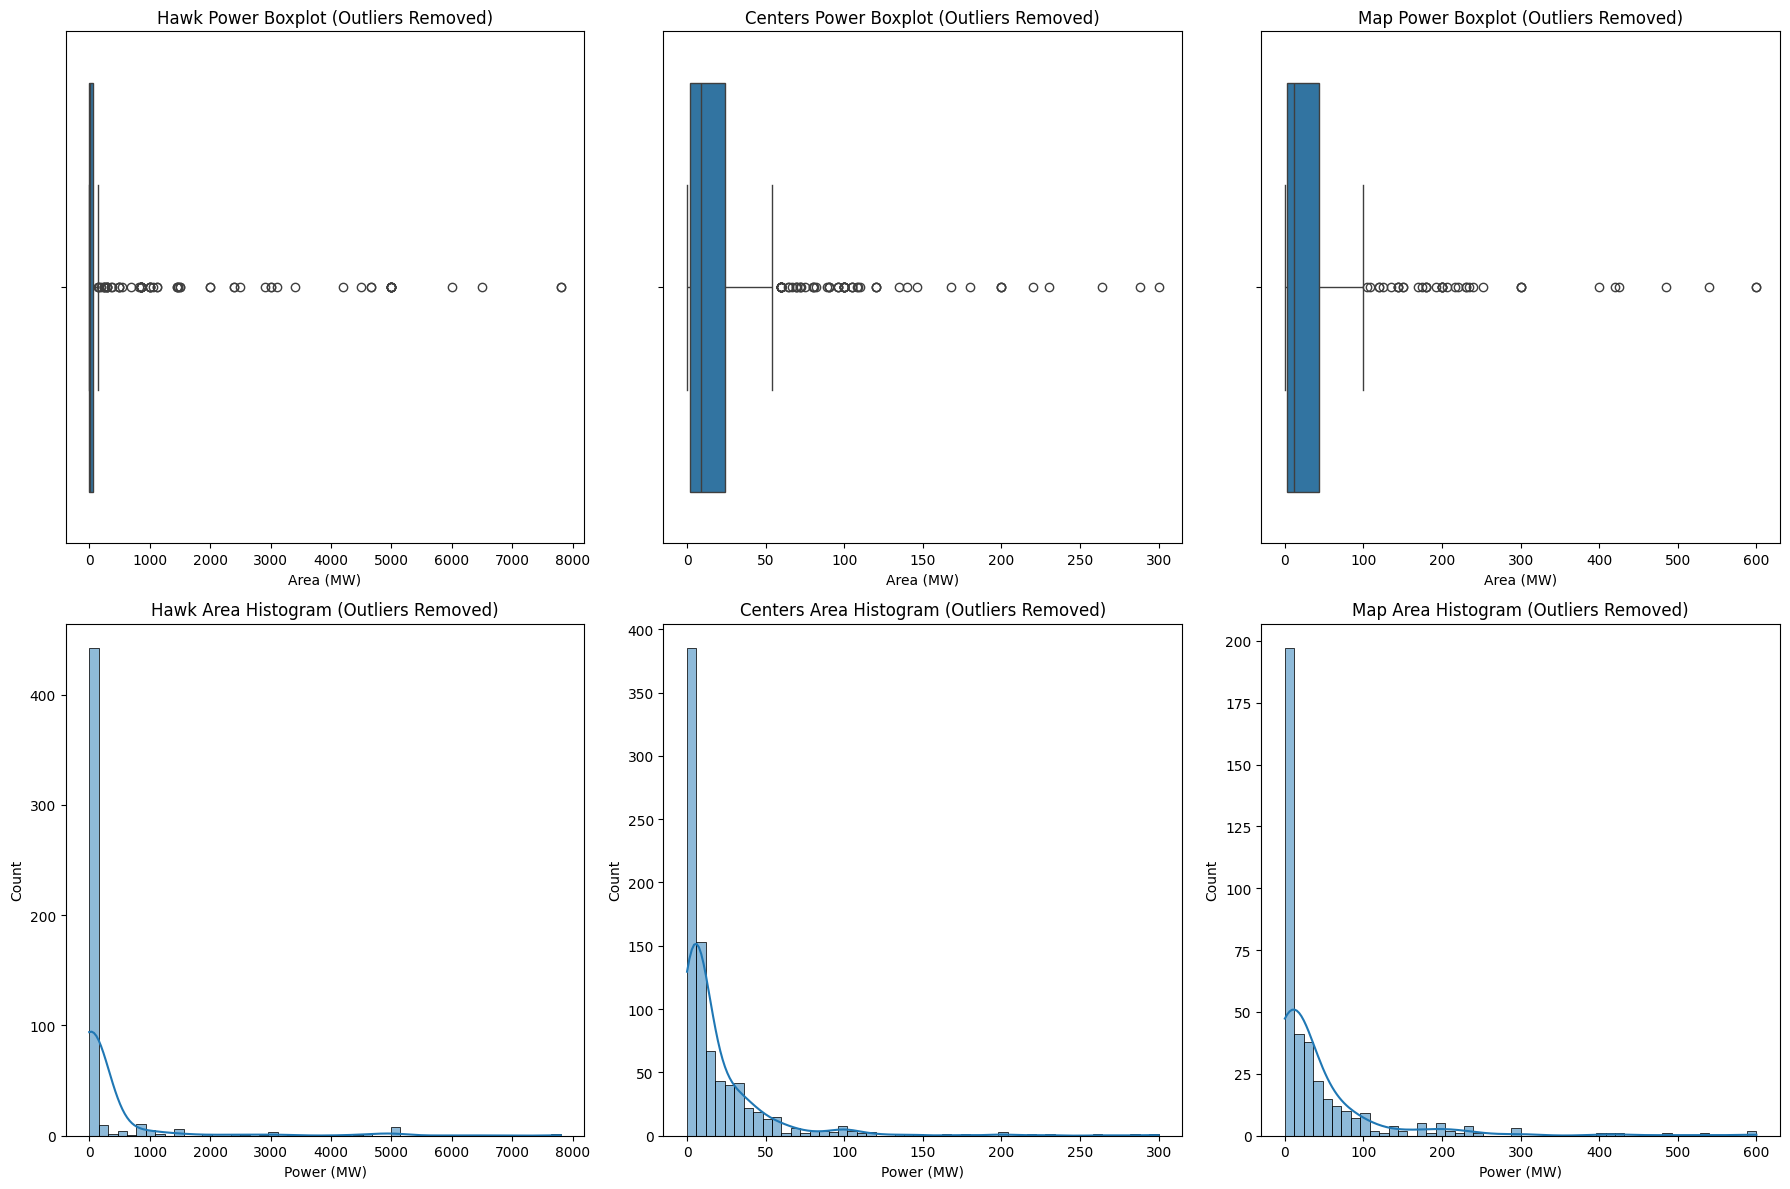

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (df, df_name) in enumerate(zip([hawk_df_cleaned, centers_df_cleaned, map_df_cleaned], ['hawk', 'centers', 'map'])):
    # Remove extreme values above the 99th percentile for better visualization
    upper_limit = np.percentile(df['Power_Standardized'].dropna(), 99)
    
    # Boxplot (Top Row)
    sns.boxplot(x=df[df['Power_Standardized'] <= upper_limit]['Power_Standardized'], ax=axes[0, i])
    axes[0, i].set_title(f"{df_name.capitalize()} Power Boxplot (Outliers Removed)")
    axes[0, i].set_xlabel("Area (MW)")

    # Histogram (Bottom Row)
    sns.histplot(df[df['Power_Standardized'] <= upper_limit]['Power_Standardized'], bins=50, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"{df_name.capitalize()} Area Histogram (Outliers Removed)")
    axes[1, i].set_xlabel("Power (MW)")

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
hf_0 = pd.read_csv('./area_power/hawk_area_cleaned.csv')
cf_0 = pd.read_csv('./area_power/centers_area_cleaned.csv')
mf_0 = pd.read_csv('./area_power/map_area_cleaned.csv')

In [7]:
mf_0.count()

unique_key            1200
source                1200
Name                  1040
Provider               973
StreetAddress         1040
City                  1040
ZipCode                986
State                 1040
Country               1040
Whitespace             564
Area                   449
YearBuilt              190
Power                  435
Scale                   63
Certifications         390
URL                   1200
Power_Standardized     392
Area_Standardized      579
dtype: int64